In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://data.cityofnewyork.us/resource/6fi9-q3ta.csv"
df = pd.read_csv(url)

# Inspect structure
print(df.columns)
print(df.head())


Index(['hour_beginning', 'location', 'pedestrians', 'towards_manhattan',
       'towards_brooklyn', 'weather_summary', 'temperature', 'precipitation',
       'lat', 'long', 'events', 'geocoded_column'],
      dtype='object')
            hour_beginning         location  pedestrians  towards_manhattan  \
0  2019-04-30T00:00:00.000  Brooklyn Bridge            3                  3   
1  2019-12-31T22:00:00.000  Brooklyn Bridge           10                  9   
2  2019-12-31T23:00:00.000  Brooklyn Bridge            2                  0   
3  2019-12-31T21:00:00.000  Brooklyn Bridge           12                  0   
4  2019-04-01T03:00:00.000  Brooklyn Bridge            1                  0   

   towards_brooklyn weather_summary  temperature  precipitation        lat  \
0                 0             NaN          NaN            NaN  40.708164   
1                 1          cloudy         42.0         0.0005  40.708164   
2                 2          cloudy         42.0         0.0004  4

In [10]:
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['day_of_week'] = df['hour_beginning'].dt.day_name()
df['year'] = df['hour_beginning'].dt.year


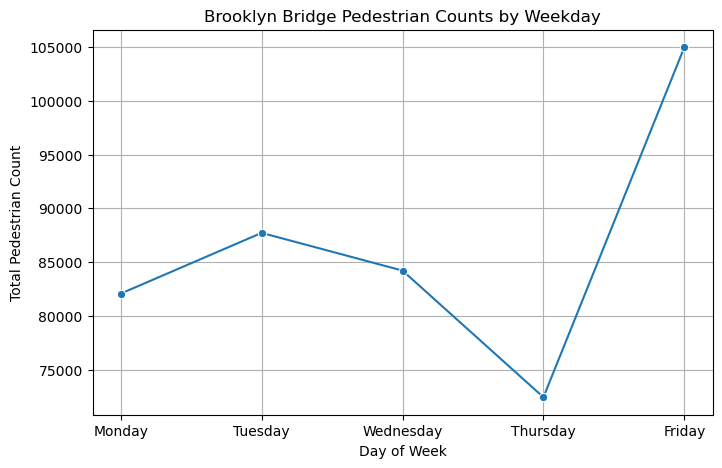

In [11]:
# Filter weekdays (Monday to Friday)
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_weekdays = df[df['day_of_week'].isin(weekdays)]

# Group by day of week
weekday_counts = df_weekdays.groupby('day_of_week')['pedestrians'].sum().reindex(weekdays)

# Plot
plt.figure(figsize=(8,5))
sns.lineplot(x=weekday_counts.index, y=weekday_counts.values, marker='o')
plt.title("Brooklyn Bridge Pedestrian Counts by Weekday")
plt.xlabel("Day of Week")
plt.ylabel("Total Pedestrian Count")
plt.grid(True)
plt.show()


weather_summary
partly-cloudy-day      1526.160804
clear-day              1319.879518
cloudy                  553.907317
sleet                   354.000000
rain                    265.117647
fog                     205.000000
snow                     83.200000
partly-cloudy-night      59.231788
clear-night              32.005025
Name: pedestrians, dtype: float64


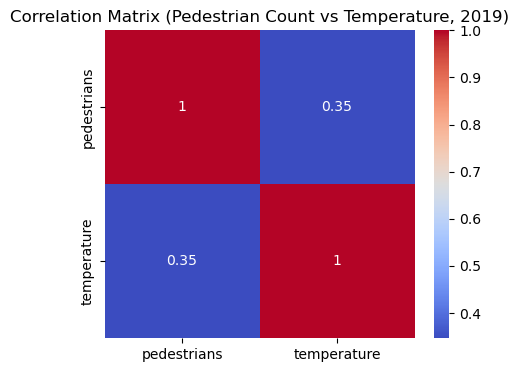

In [12]:
# Filter for 2019
df_2019 = df[df['year'] == 2019]

# Drop rows with missing weather or pedestrian data
df_2019 = df_2019.dropna(subset=['pedestrians', 'weather_summary'])

# Group by weather summary
weather_summary = df_2019.groupby('weather_summary')['pedestrians'].mean().sort_values(ascending=False)

print(weather_summary)

# Compute correlation matrix for numeric columns
corr_matrix = df_2019[['pedestrians', 'temperature']].corr()

# Visualize correlation matrix
plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Pedestrian Count vs Temperature, 2019)")
plt.show()


In [13]:
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['hour'] = df['hour_beginning'].dt.hour
df['time_of_day'] = df['hour'].apply(categorize_time_of_day)


C:\Users\happy\AppData\Local\Temp\ipykernel_24600\4199525090.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=time_activity.index, y=time_activity.values, palette='pastel')


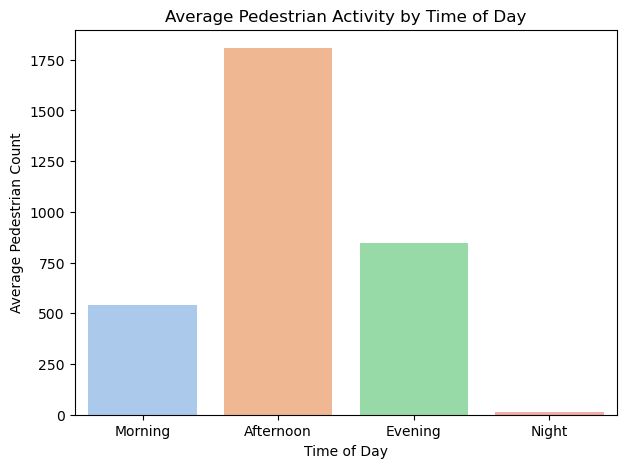

In [14]:
# Average pedestrians by time of day
time_activity = df.groupby('time_of_day')['pedestrians'].mean().reindex(['Morning','Afternoon','Evening','Night'])

# Plot
plt.figure(figsize=(7,5))
sns.barplot(x=time_activity.index, y=time_activity.values, palette='pastel')
plt.title("Average Pedestrian Activity by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Average Pedestrian Count")
plt.show()
